<a href="https://colab.research.google.com/github/Vicysaragih/IDCamp-2024-Level-Menengah/blob/main/IDCamp_2024_Level_Menengah_2_Feb_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Membuat Model untuk Klasifikasi Dua Kelas**

In [2]:

import pandas as pd

# Opsi 2 (menggunakan dataset dari google drive)
df = pd.read_csv('https://drive.google.com/uc?id=1XZbZ5Z7MBXYaR3UO1HbQ4ncPi4R3HsyF')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


model neural network tidak bisa memproses kategori

In [7]:
df.name[df.name == 'grapefruit'] = 0
df.name[df.name == 'orange'] = 1

<ipython-input-7-46c1d127ccaf>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.name[df.name == 'grapefruit'] = 0
<ipython-input-7-46c1d127ccaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Jika label banyak = menggunakan fungsi LabelEncoder yang disediakan oleh sklearn

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  int64  
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


In [9]:
df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


Model belum bisa diproses karena masih bentuk dataframe. Dataset harus diubah menjadi array.


In [10]:
dataset = df.values

In [12]:
''' pilih 5 kolom terakhir sebagai atribut
bilangan sebelum koma untuk memilih baris pada dataframe
bilangan setelah koma untuk memilih kolom pada dataframe '''
X = dataset[:,1:6]

Memisahkan label dari dataset

In [13]:
y = dataset[:,0]

Rentang masih cukup besar sehingga perlu normaisasi

In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [15]:
# pisahkan data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [17]:
# Membangun Model
# Import library

from keras.models import Sequential
from keras.layers import Dense

In [18]:
# Untuk layer terakhir, isi parameter unit isi dengan 1 di mana output dari model neural network kita merupakan satu buah bilangan numerik.

model = Sequential([
                    Dense(32, activation='relu', input_shape=(5,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5570 - loss: 0.6633
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8509 - loss: 0.6091
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8969 - loss: 0.5370
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.4499
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9159 - loss: 0.3703
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9267 - loss: 0.3037
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9249 - loss: 0.2588
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9254 - loss: 0.2313
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.2150
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9296 - loss: 0.2006
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 0.1922
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

Untuk melihat loss dan akurasi model pada data test, gunakan fungsi evaluate pada model. Fungsi Evaluate mengembalikan 2 nilai. Yang pertama adalah nilai loss, dan yang kedua adalah nilai akurasinya.

In [21]:
model.evaluate(X_test, Y_test, batch_size=1)

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9225 - loss: 0.1804


[0.1827894151210785, 0.9253333210945129]

# **Membuat dan Melatih Model untuk Klasifikasi Banyak Kelas**

In [22]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [23]:
df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Hapus kolom Id karena tidak ada hubungannya dengan label

df = df.drop(columns='Id')

fungsi get_dummies() = mengubah setiap variabel dalam menjadi angka sebanyak nilai yang berbeda.

In [25]:
category = pd.get_dummies(df.Species, dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [26]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# Kemudian, kita perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena sudah ada variabel baru dan tidak akan terpakai lagi.

new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [28]:
# Setelah selesai mengolah dataframe, kita harus melakukan konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe.

dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [29]:
# Memisahkan atribut dan label
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [30]:
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [31]:
# Membagi data menjadi data uji dan  data latih

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [32]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax')]) # Softmax = umum dipakai untuk klasifikasi multi kelas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Optimizer & Loss Function

model.compile(optimizer='Adam',
              loss='categorical_crossentropy', # klasifikasi multikelas
              metrics=['accuracy'])

In [34]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3738 - loss: 1.0930
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7052 - loss: 1.0646
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6167 - loss: 1.0403
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6635 - loss: 1.0120 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6740 - loss: 0.9814 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6687 - loss: 0.9539
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6823 - loss: 0.9213
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6510 - loss: 0.8984
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6958 - loss: 0.8497 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6500 - loss: 0.8316 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6677 - loss: 0.7915
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6958 

In [35]:
model.evaluate(X_test, Y_test, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.0920


[0.12179816514253616, 0.9333333373069763]

# **Plot Loss dan Akurasi dari Trained Model**

In [36]:
import matplotlib.pyplot as plt

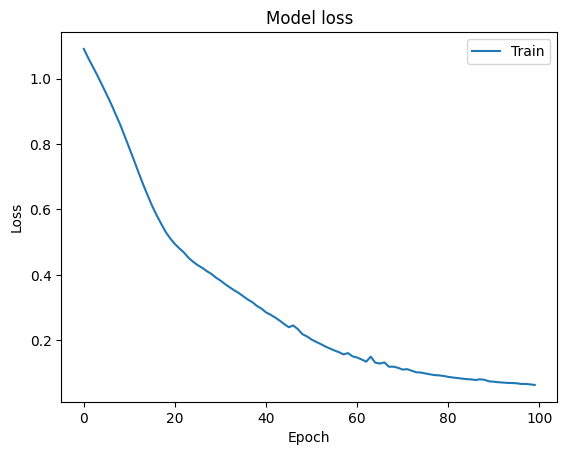

In [37]:
# Plot Loss

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Dari hasil plot loss di atas, Anda dapat melihat bahwa loss model berkurang sangat signifikan dari epoch pertama sampai epoch ke-100.

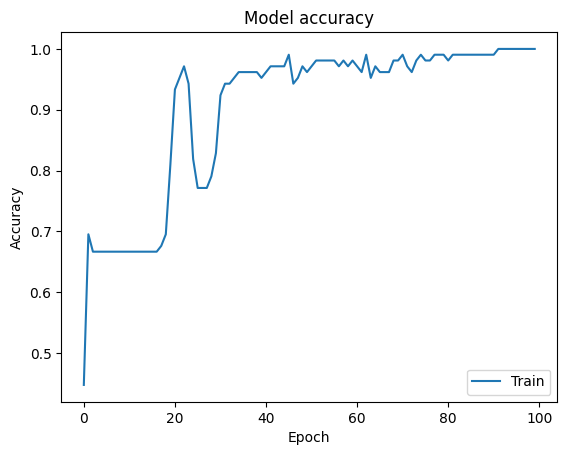

In [38]:
# Plot Akurasi

plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

Dari hasil plot di atas, Anda dapat melihat bahwa akurasi model stagnan pada epoch di sekitar 20 dan juga kembali stagnan pada epoch di atas 80.

# **Mencegah Overfitting dengan Dropout dan Batch Normalization**

In [39]:
'''
from keras.layers import Dense, Dropout
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0,5),
                    Dense(3, activation='softmax')]
'''

"\nfrom keras.layers import Dense, Dropout\nmodel = Sequential([\n                    Dense(64, activation='relu', input_shape=(4,)),\n                    Dense(64, activation='relu'),\n                    Dropout(0,5),\n                    Dense(3, activation='softmax')]\n"